In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter ('ignore' , category="ConvergenceWarning")

In [24]:
df_heart = pd.read_csv('heart.csv')
df_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [25]:
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [26]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [27]:
kolom=len(df_heart.columns) #untuk mengilangkan nilai null pada dataframe seperti '?' dan baris 'NaN'/baris yang kosong
for i in range (0,kolom):
  df_heart=df_heart[df_heart.iloc[:,i]!='?']
  df_heart=df_heart[df_heart.iloc[:,i]!=' ']
  df_heart=df_heart[~df_heart.iloc[:,i].isna()]
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_heart['Sex'] = le.fit_transform(df_heart['Sex'])
df_heart['ChestPainType'] = le.fit_transform(df_heart['ChestPainType'])
df_heart['RestingECG'] = le.fit_transform(df_heart['RestingECG'])
df_heart['ExerciseAngina'] = le.fit_transform(df_heart['ExerciseAngina'])
df_heart['ST_Slope'] = le.fit_transform(df_heart['ST_Slope'])
df_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


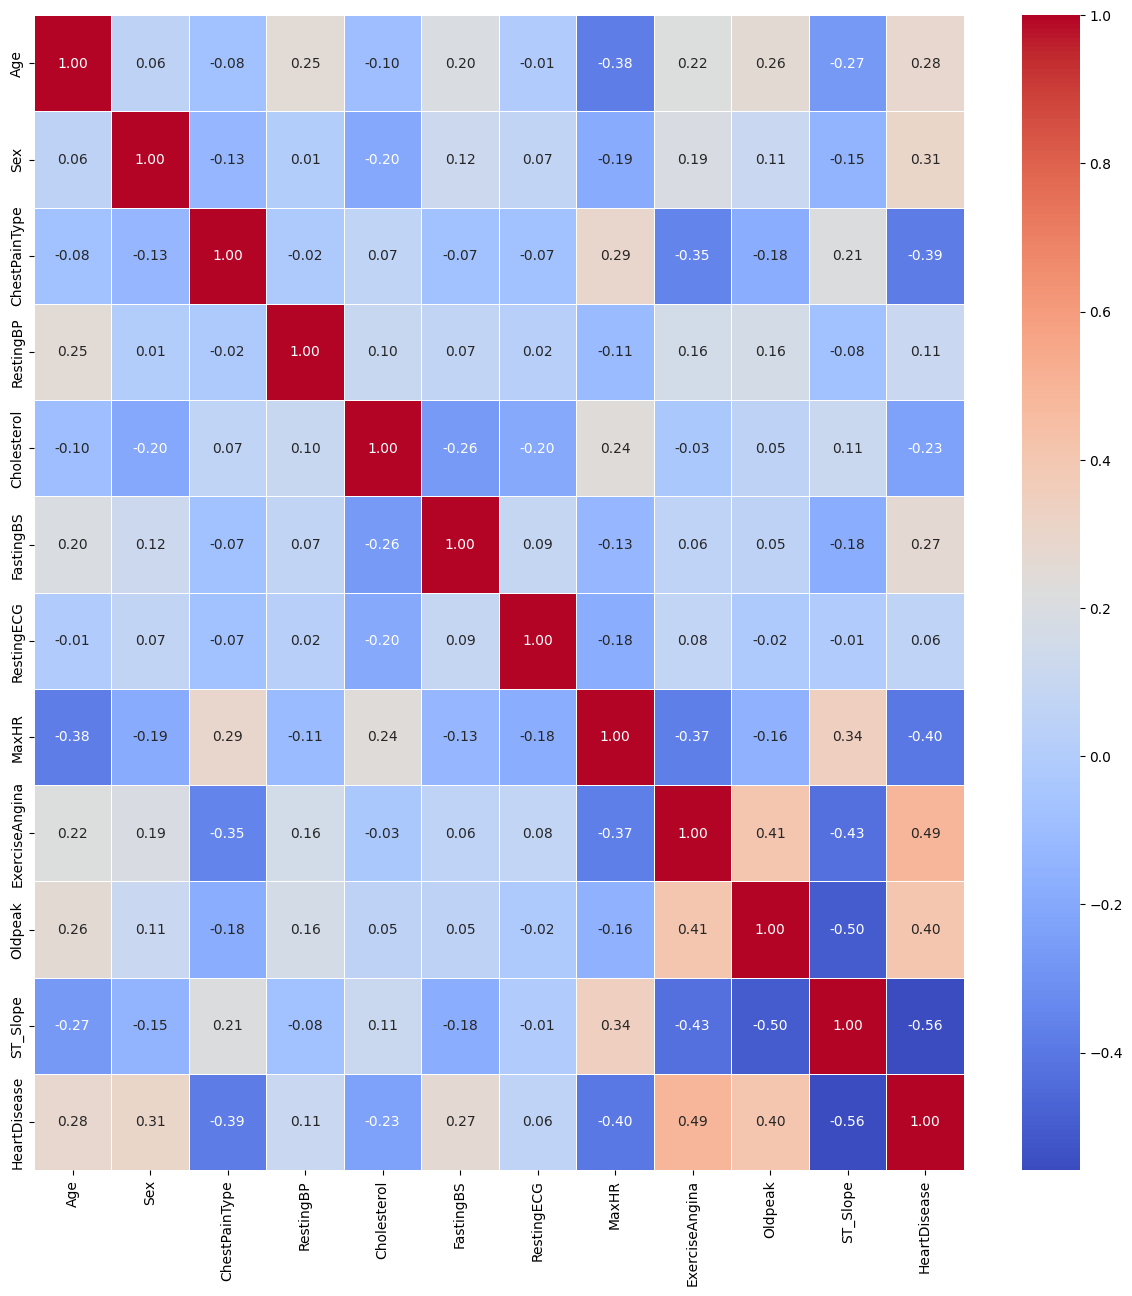

In [29]:
import matplotlib.pyplot as plt #korelasi hubungan antar variabel dapat dilihat dari korelasi di bawah
import seaborn as sns
plt.figure(figsize=(15,15))# bahwa Total_Phenols,Flavanoids, dan OD280 memliki pengaruh yang besar
sns.heatmap(df_heart.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [30]:
import scipy
from scipy import stats

z=[]
for i in range (0,kolom-1):
  k,y=stats.pearsonr(df_heart.iloc[:,i],df_heart.iloc[:,-1])
  z.append([i,df_heart.columns[i], abs(k)])

z=sorted(z, key=lambda z:z[2], reverse=True)
z=pd.DataFrame(z,columns=["KolomKe","Nama Kolom","KoefisienKorelasi-Pearson"])
z

,KolomKe,Nama Kolom,KoefisienKorelasi-Pearson
0,10,ST_Slope,0.558771
1,8,ExerciseAngina,0.494282
2,9,Oldpeak,0.403951
3,7,MaxHR,0.400421
4,2,ChestPainType,0.386828
5,1,Sex,0.305445
6,0,Age,0.282039
7,5,FastingBS,0.267291
8,4,Cholesterol,0.232741
9,3,RestingBP,0.107589


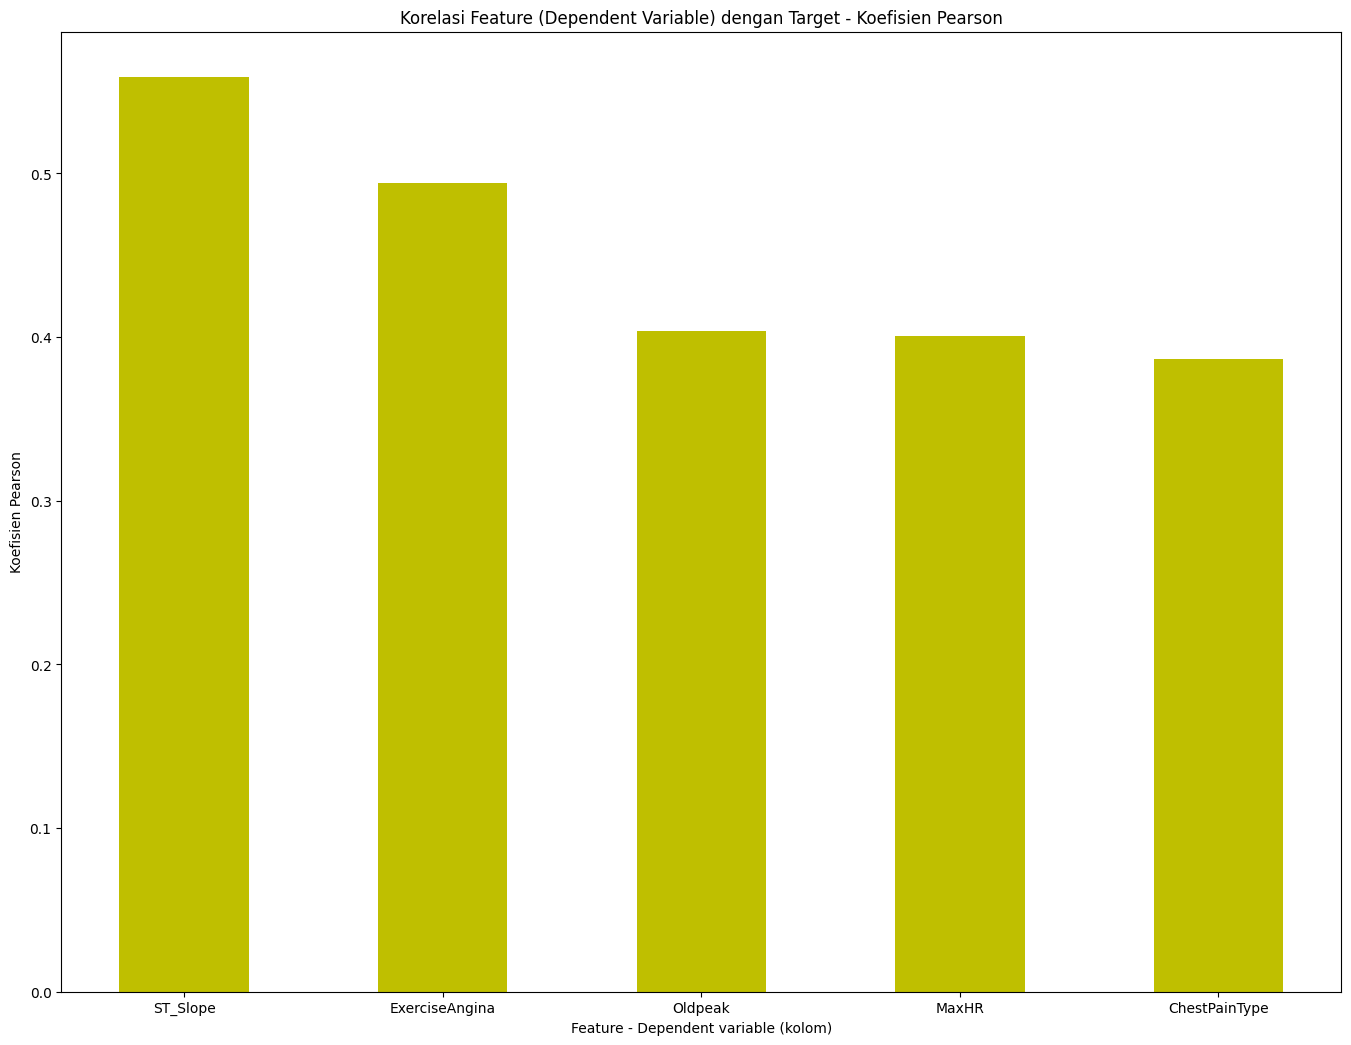

In [31]:
import matplotlib.pyplot as plt
g=z.head(5)
fig = plt.figure()

ax = fig.add_axes([1,1, 2, 2])
x_axis = g.iloc[:,1]
y_axis = g.iloc[:,2]

ax.bar(x_axis , y_axis, color = 'y', width = 0.5)

plt.title('Korelasi Feature (Dependent Variable) dengan Target - Koefisien Pearson')

plt.xlabel('Feature - Dependent variable (kolom)')
plt.ylabel('Koefisien Pearson')
plt.show()

In [32]:
df_pilihan = df_heart[['ST_Slope','ExerciseAngina','Oldpeak','MaxHR','HeartDisease']]
df_pilihan

,ST_Slope,ExerciseAngina,Oldpeak,MaxHR,HeartDisease
0,2,0,0.0,172,0
1,1,0,1.0,156,1
2,2,0,0.0,98,0
3,1,1,1.5,108,1
4,2,0,0.0,122,0
...,...,...,...,...,...
913,1,0,1.2,132,1
914,1,0,3.4,141,1
915,1,1,1.2,115,1
916,1,0,0.0,174,1


PROSES DATA TRAINING 

In [33]:
x=df_pilihan.iloc[:,:-1]
y=df_pilihan.iloc[:,-1]
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

ALGORITMA DECISION TREE 

In [34]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True)

In [36]:
scores1 = cross_val_score(clf, x, y, cv=kf)
print(scores1)
print('rata rata KFold nya adalah: ',scores1.mean())

[0.68478261 0.77173913 0.66304348 0.82608696 0.68478261 0.7826087
 0.84782609 0.72826087 0.75824176 0.79120879]
rata rata KFold nya adalah:  0.7538580984233159


In [37]:
prediksi1 = clf.predict(x_test)
prediksi1

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
print('Accuracy Score untuk algoritma Decision Tree : ',accuracy_score(prediksi1,y_test)*100,'%')

Accuracy Score untuk algoritma Decision Tree :  75.0 %


Nilai AUC Klasifikasi:  0.7500887049083383
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.74736842 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.24719101 1.        ]
Akurasi Klasifikasi:  75.0 %
f-measure score:  0.7498817966903074
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


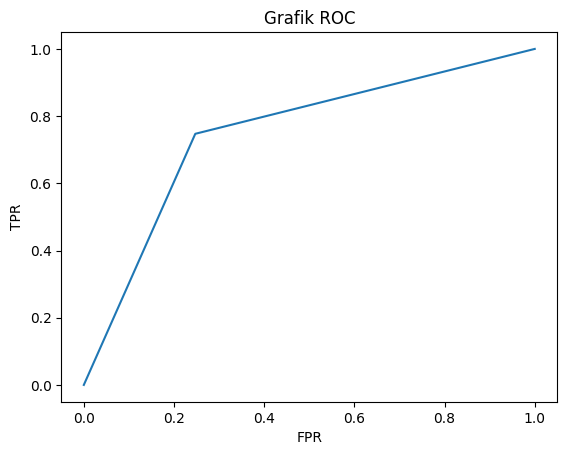

In [39]:
#Analisa Performa dari Klasifikasi
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediksi1, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fpr, tpr))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(prediksi1,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measure=f1_score(y_test,prediksi1,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fpr,tpr)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

In [40]:
from sklearn.svm import SVC
modelSVM = SVC(kernel = "linear")
modelSVM.fit(x_train, y_train)

SVC(kernel='linear')

In [41]:
scores9 = cross_val_score(modelSVM, x, y, cv=kf)
print(scores9)
print('rata rata SVM adalah: ',scores9.mean())

[0.77173913 0.82608696 0.85869565 0.82608696 0.80434783 0.7826087
 0.81521739 0.81521739 0.82417582 0.81318681]
rata rata SVM adalah:  0.8137362637362637


In [42]:
y_predSVM = modelSVM.predict(x_test)
y_predSVM

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [43]:
accuracySVM= accuracy_score(y_test, y_predSVM)
hasil9 = accuracySVM * 100
print("Akurasi untuk penggunaan algoritma SVM :", (accuracySVM)*100,'%')

Akurasi untuk penggunaan algoritma SVM : 75.54347826086956 %


Nilai AUC Klasifikasi:  0.7557066824364281
Nilai TPR (True Positive Rate) Klasifikasi:  [0.         0.74736842 1.        ]
Nilai FPR (False Positive Rate) Klasifikasi:  [0.         0.24719101 1.        ]
Akurasi Klasifikasi:  75.54347826086956 %
f-measure score:  0.7498817966903074
Area dibawah Grafik ROC adalah AUC(Area Under Curve)


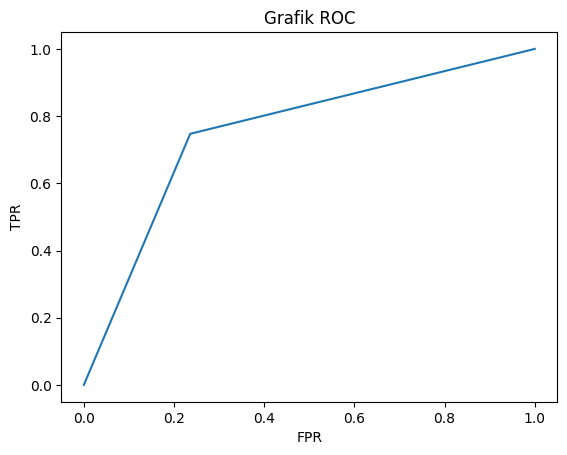

In [44]:
#Analisa Performa dari Klasifikasi
fprSVM, tprSVM, thresholdsSVM = metrics.roc_curve(y_test, y_predSVM, pos_label=1)
print('Nilai AUC Klasifikasi: ', metrics.auc(fprSVM, tprSVM))
print('Nilai TPR (True Positive Rate) Klasifikasi: ', tpr)
print('Nilai FPR (False Positive Rate) Klasifikasi: ', fpr)
#Analisa Akurasi dari Klasifikasi
print('Akurasi Klasifikasi: ',metrics.accuracy_score(y_predSVM,y_test)*100,'%')
#Analisa f-measure menggunakan sklearn
from sklearn.metrics import f1_score
f_measureSVM=f1_score(y_test,y_predSVM,average='macro')
print('f-measure score: ',f_measure)
plt.plot(fprSVM,tprSVM)
plt.title('Grafik ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
print('Area dibawah Grafik ROC adalah AUC(Area Under Curve)')

AUC DAN ROC DENGAN PLOTLY

In [47]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(fpr, tpr, model_name, auc_score):
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines',
                             name=f'{model_name} (AUC={auc_score:.2f})'))

fig = go.Figure()

plot_roc_curve(fpr, tpr, 'Decision Tree', metrics.auc(fpr, tpr))
plot_roc_curve(fprSVM, tprSVM, 'Random Forest', metrics.auc(fprSVM, tprSVM))


# Menambahkan garis referensi diagonal
fig.add_shape(type='line', line=dict(dash='dash'),
              x0=0, x1=1, y0=0, y1=1)

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500,
    title='Kurva ROC untuk Tiga Model Klasifikasi'
)

fig.show()